In [207]:
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from itertools import chain
import re
import http.client
import sys
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from copy import deepcopy
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [208]:
import http.client

con = http.client.HTTPConnection('https://api.spotify.com', 80, timeout=10)

print(con)

In [209]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


In [210]:


with open("API.txt", encoding="utf-8-sig") as f:
    secret_ls = f.readlines()
    cid = secret_ls[0][:-1]
    secret = secret_ls[1]
        

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
    
playlist_link = "https://open.spotify.com/playlist/1tpaq0ljvCNcTuHy1yjyTY?si=c7a7447ad8214659"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]
    
    


In [211]:
track_uris

['spotify:track:2WfaOiMkCvy7F5fcp2zZ8L',
 'spotify:track:665Jxlgi1HamPKbW1vwzx4',
 'spotify:track:29r3fDexnrto7WABfpblNH',
 'spotify:track:4RvWPyQ5RL0ao9LPZeSouE',
 'spotify:track:40riOy7x9W7GXjyGp4pjAv',
 'spotify:track:10zlwR7kvVbD9OBkeZWr3L',
 'spotify:track:3GfGTJ2xzC0rqKgdjNJLOC',
 'spotify:track:3zqTlJtp7KTPrNUKNahvAo',
 'spotify:track:4zmx3vEPgRPjRT2CszUsZo',
 'spotify:track:5L7zWiRiXDPNvTLLoXvIja',
 'spotify:track:6hs3SDnbO3f6VQuPO4KBEb',
 'spotify:track:3FCto7hnn1shUyZL42YgfO',
 'spotify:track:0f798jZ9aYI34zo4lchKd0',
 'spotify:track:77NNZQSqzLNqh2A9JhLRkg',
 'spotify:track:3MrRksHupTVEQ7YbA0FsZK',
 'spotify:track:4ByEFOBuLXpCqvO1kw8Wdm',
 'spotify:track:44hOGg1uFg1XJZGZYNwYmM',
 'spotify:track:0Cc1TGI0VBQDltJJ4a4dmj',
 'spotify:track:5ZpDiWqCG93McsnuHu9uCR',
 'spotify:track:4aWn4NHlELpOehxsBaQeoe',
 'spotify:track:33iAwBBb962LFQei4J0b0b',
 'spotify:track:5dRQUolXAVX3BbCiIxmSsf',
 'spotify:track:0EMmVUYs9ZZRHtlADB88uz',
 'spotify:track:3L7RtEcu1Hw3OXrpnthngx',
 'spotify:track:

In [212]:
data = []
    
for track in sp.playlist_tracks(playlist_URI)["items"]:  

    #URI
    track_uri = track["track"]["uri"]
    
    #Track name
    track_name = track["track"]["name"]
    
    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)
    
    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]
    
    #Album
    album = track["track"]["album"]["name"]
    
    #Popularity of the track
    track_pop = track["track"]["popularity"]
    
    

In [144]:
data = sp.audio_features(track_uris)

In [145]:
len(data)

100

In [146]:
data

[{'danceability': 0.573,
  'energy': 0.902,
  'key': 6,
  'loudness': -7.638,
  'mode': 0,
  'speechiness': 0.054,
  'acousticness': 0.018,
  'instrumentalness': 0.00125,
  'liveness': 0.0928,
  'valence': 0.876,
  'tempo': 84.412,
  'type': 'audio_features',
  'id': '2WfaOiMkCvy7F5fcp2zZ8L',
  'uri': 'spotify:track:2WfaOiMkCvy7F5fcp2zZ8L',
  'track_href': 'https://api.spotify.com/v1/tracks/2WfaOiMkCvy7F5fcp2zZ8L',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2WfaOiMkCvy7F5fcp2zZ8L',
  'duration_ms': 225280,
  'time_signature': 4},
 {'danceability': 0.706,
  'energy': 0.322,
  'key': 5,
  'loudness': -14.108,
  'mode': 1,
  'speechiness': 0.0467,
  'acousticness': 0.528,
  'instrumentalness': 2.37e-06,
  'liveness': 0.576,
  'valence': 0.305,
  'tempo': 135.154,
  'type': 'audio_features',
  'id': '665Jxlgi1HamPKbW1vwzx4',
  'uri': 'spotify:track:665Jxlgi1HamPKbW1vwzx4',
  'track_href': 'https://api.spotify.com/v1/tracks/665Jxlgi1HamPKbW1vwzx4',
  'analysis_url': 'https

In [147]:
#data.append(sp.audio_features(track_uri))
    
df7 = pd.DataFrame(list(chain.from_iterable(data)))    

In [148]:
df7 = pd.DataFrame.from_dict(data)

In [149]:
df7

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.573,0.902,6,-7.638,0,0.0540,0.01800,0.001250,0.0928,0.876,84.412,audio_features,2WfaOiMkCvy7F5fcp2zZ8L,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,https://api.spotify.com/v1/tracks/2WfaOiMkCvy7...,https://api.spotify.com/v1/audio-analysis/2Wfa...,225280,4
1,0.706,0.322,5,-14.108,1,0.0467,0.52800,0.000002,0.5760,0.305,135.154,audio_features,665Jxlgi1HamPKbW1vwzx4,spotify:track:665Jxlgi1HamPKbW1vwzx4,https://api.spotify.com/v1/tracks/665Jxlgi1Ham...,https://api.spotify.com/v1/audio-analysis/665J...,221133,4
2,0.807,0.830,4,-4.040,1,0.0367,0.04440,0.000358,0.0842,0.954,128.501,audio_features,29r3fDexnrto7WABfpblNH,spotify:track:29r3fDexnrto7WABfpblNH,https://api.spotify.com/v1/tracks/29r3fDexnrto...,https://api.spotify.com/v1/audio-analysis/29r3...,203267,4
3,0.645,0.795,7,-12.095,1,0.0527,0.34700,0.003890,0.1040,0.535,112.067,audio_features,4RvWPyQ5RL0ao9LPZeSouE,spotify:track:4RvWPyQ5RL0ao9LPZeSouE,https://api.spotify.com/v1/tracks/4RvWPyQ5RL0a...,https://api.spotify.com/v1/audio-analysis/4RvW...,251489,4
4,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,audio_features,40riOy7x9W7GXjyGp4pjAv,spotify:track:40riOy7x9W7GXjyGp4pjAv,https://api.spotify.com/v1/tracks/40riOy7x9W7G...,https://api.spotify.com/v1/audio-analysis/40ri...,391376,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.445,0.706,8,-9.803,1,0.0461,0.23400,0.000252,0.2050,0.768,80.823,audio_features,43DeSV93pJPT4lCZaWZ6b1,spotify:track:43DeSV93pJPT4lCZaWZ6b1,https://api.spotify.com/v1/tracks/43DeSV93pJPT...,https://api.spotify.com/v1/audio-analysis/43De...,266720,4
96,0.920,0.654,11,-3.051,0,0.0401,0.02360,0.015800,0.0359,0.847,117.046,audio_features,5ChkMS8OtdzJeqyybCc9R5,spotify:track:5ChkMS8OtdzJeqyybCc9R5,https://api.spotify.com/v1/tracks/5ChkMS8OtdzJ...,https://api.spotify.com/v1/audio-analysis/5Chk...,293827,4
97,0.851,0.551,4,-5.177,1,0.0396,0.15100,0.000000,0.0827,0.807,131.922,audio_features,66S14BkJDxgkYxLl5DCqOz,spotify:track:66S14BkJDxgkYxLl5DCqOz,https://api.spotify.com/v1/tracks/66S14BkJDxgk...,https://api.spotify.com/v1/audio-analysis/66S1...,219467,4
98,0.461,0.918,4,-8.507,1,0.0959,0.40500,0.000330,0.1260,0.802,172.435,audio_features,4tyl9OMKMG8F2L0RUYQMH3,spotify:track:4tyl9OMKMG8F2L0RUYQMH3,https://api.spotify.com/v1/tracks/4tyl9OMKMG8F...,https://api.spotify.com/v1/audio-analysis/4tyl...,249960,4


In [150]:
df7.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.630990,0.732580,4.260000,-8.139150,0.680000,0.046736,0.165874,0.027198,0.165037,0.687220,126.784760,250868.510000,3.99
std,0.129261,0.171924,3.597474,2.736444,0.468826,0.028658,0.162358,0.117226,0.128545,0.216989,25.622282,46620.958694,0.10
min,0.286000,0.313000,0.000000,-18.064000,0.000000,0.024900,0.000418,0.000000,0.025100,0.184000,71.105000,151867.000000,3.00
25%,0.543500,0.647500,1.000000,-9.810500,0.000000,0.033150,0.043300,0.000001,0.072150,0.563750,109.689750,221786.750000,4.00
50%,0.644500,0.771000,4.000000,-7.879000,1.000000,0.039850,0.115500,0.000046,0.115500,0.734000,123.527000,241100.000000,4.00
75%,0.725000,0.869250,7.000000,-6.060500,1.000000,0.050100,0.234500,0.003917,0.234250,0.867000,144.100750,272580.250000,4.00
max,0.933000,0.984000,11.000000,-2.658000,1.000000,0.224000,0.669000,0.807000,0.622000,0.978000,205.528000,392676.000000,4.00


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

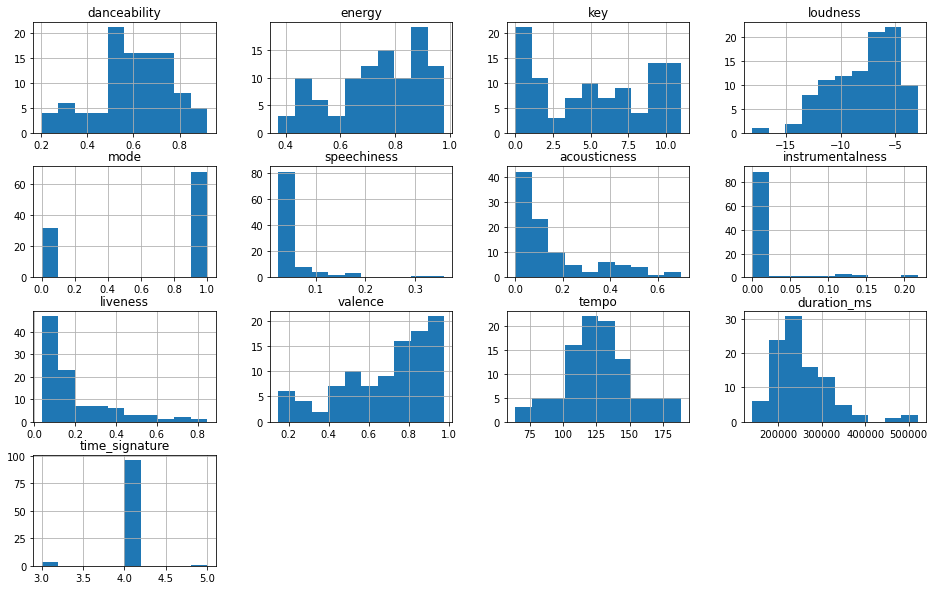

In [40]:
df1.hist(figsize = (16, 10))

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

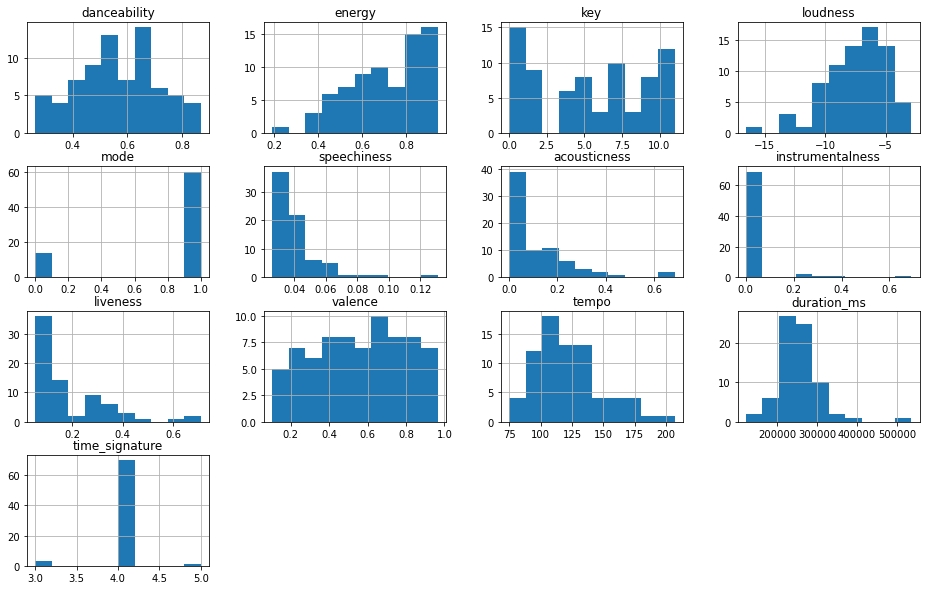

In [52]:
df2.hist(figsize = (16,10))

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

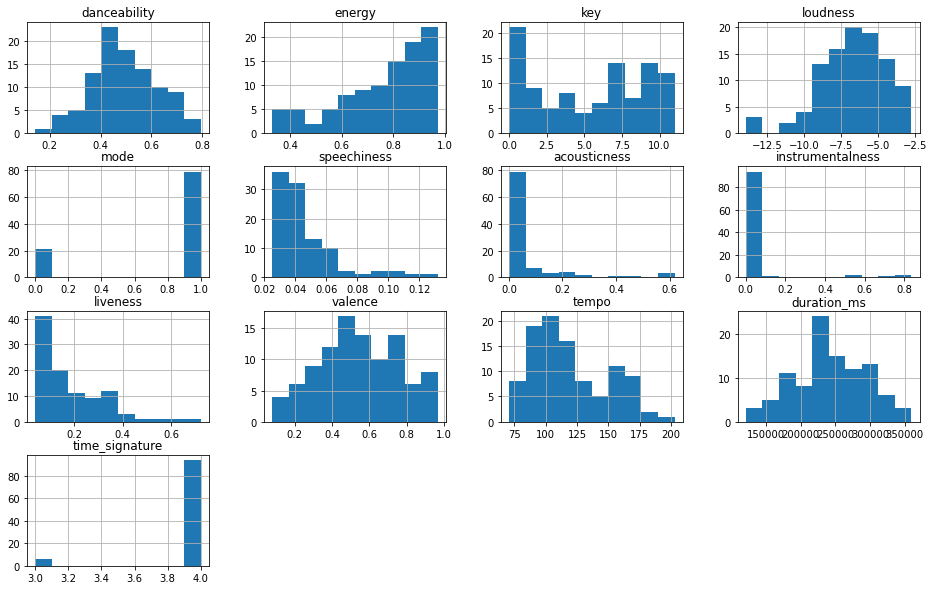

In [64]:
df3.hist(figsize = (16,10))

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

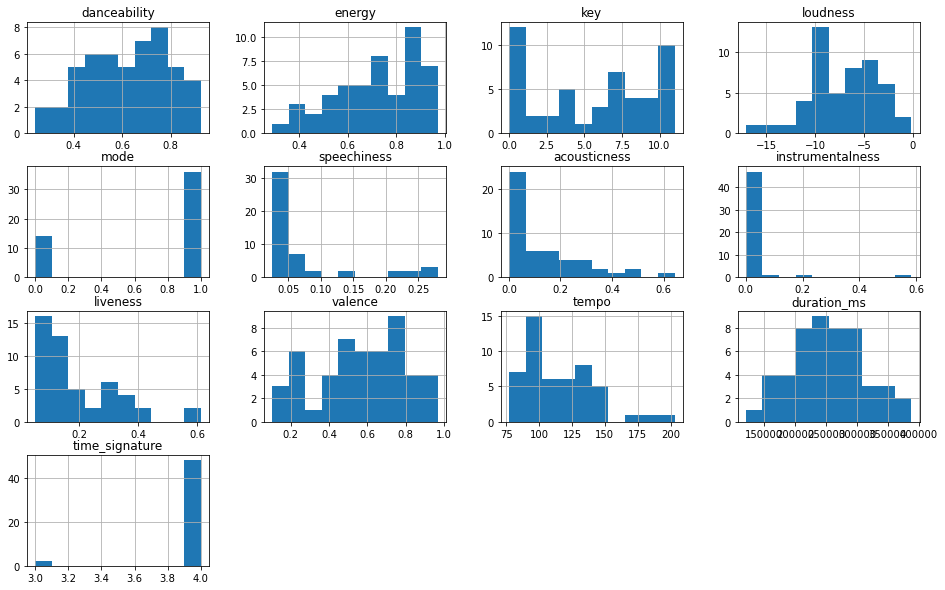

In [81]:
df4.hist(figsize = (16,10))

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

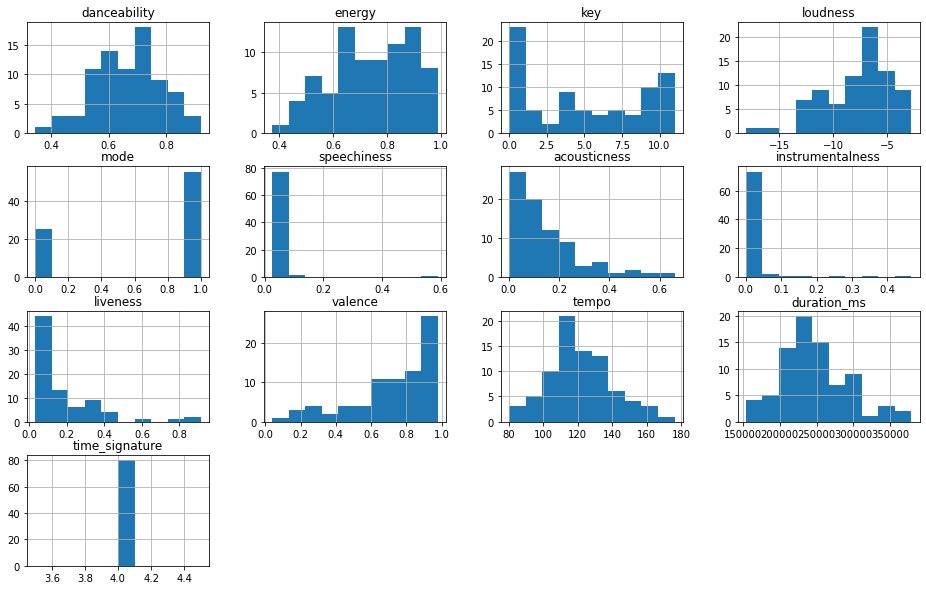

In [124]:
df5.hist(figsize = (16,10))

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

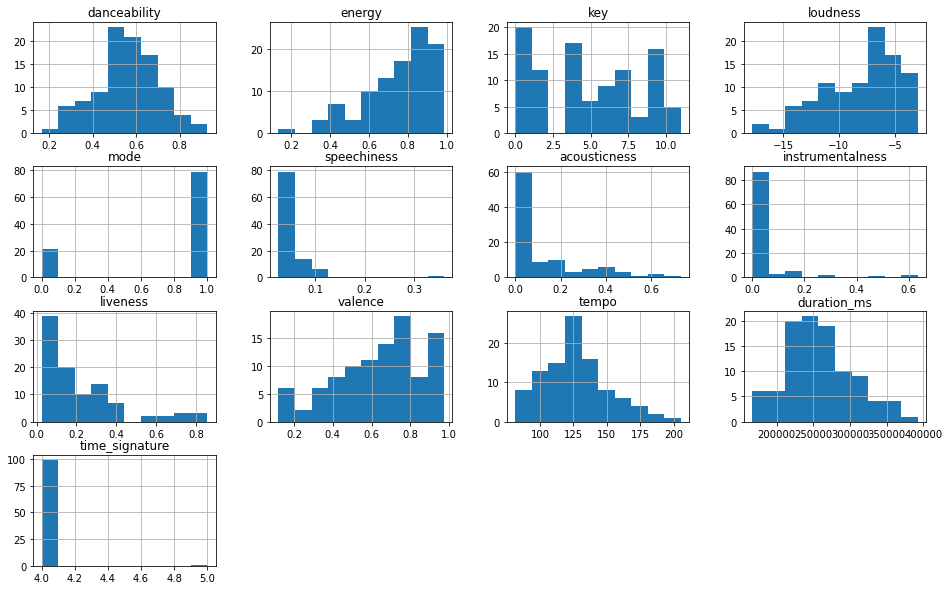

In [137]:
df6.hist(figsize = (16,10))

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

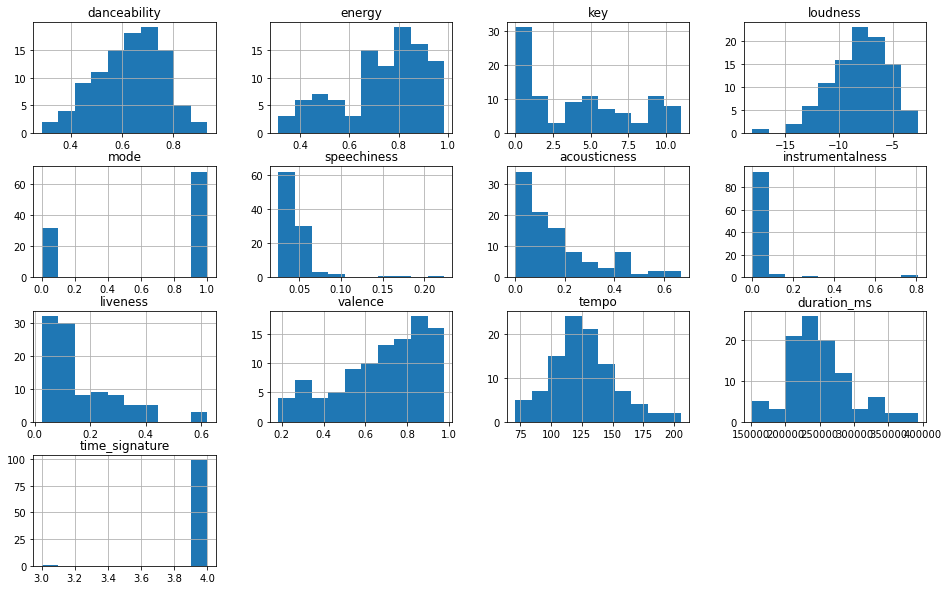

In [151]:
df7.hist(figsize = (16,10))

In [152]:
df_compile = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis = 0)

In [153]:
df_compile

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.331,0.550,0,-6.483,1,0.0272,0.6050,0.000004,0.1920,0.429,177.734,audio_features,70C4NyhjD5OZUMzvWZ3njJ,spotify:track:70C4NyhjD5OZUMzvWZ3njJ,https://api.spotify.com/v1/tracks/70C4NyhjD5OZ...,https://api.spotify.com/v1/audio-analysis/70C4...,339000,3
1,0.671,0.373,9,-18.064,1,0.0323,0.2570,0.000080,0.0481,0.732,92.718,audio_features,2374M0fQpWi3dLnB54qaLX,spotify:track:2374M0fQpWi3dLnB54qaLX,https://api.spotify.com/v1/tracks/2374M0fQpWi3...,https://api.spotify.com/v1/audio-analysis/2374...,295893,4
2,0.920,0.654,11,-3.051,0,0.0401,0.0236,0.015800,0.0359,0.847,117.046,audio_features,5ChkMS8OtdzJeqyybCc9R5,spotify:track:5ChkMS8OtdzJeqyybCc9R5,https://api.spotify.com/v1/tracks/5ChkMS8OtdzJ...,https://api.spotify.com/v1/audio-analysis/5Chk...,293827,4
3,0.701,0.944,4,-2.986,1,0.0455,0.0755,0.000000,0.6010,0.792,128.993,audio_features,5zA8vzDGqPl2AzZkEYQGKh,spotify:track:5zA8vzDGqPl2AzZkEYQGKh,https://api.spotify.com/v1/tracks/5zA8vzDGqPl2...,https://api.spotify.com/v1/audio-analysis/5zA8...,197707,4
4,0.716,0.625,1,-11.369,0,0.0601,0.3960,0.000020,0.1340,0.826,125.276,audio_features,2BY7ALEWdloFHgQZG6VMLA,spotify:track:2BY7ALEWdloFHgQZG6VMLA,https://api.spotify.com/v1/tracks/2BY7ALEWdloF...,https://api.spotify.com/v1/audio-analysis/2BY7...,186827,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.445,0.706,8,-9.803,1,0.0461,0.2340,0.000252,0.2050,0.768,80.823,audio_features,43DeSV93pJPT4lCZaWZ6b1,spotify:track:43DeSV93pJPT4lCZaWZ6b1,https://api.spotify.com/v1/tracks/43DeSV93pJPT...,https://api.spotify.com/v1/audio-analysis/43De...,266720,4
96,0.920,0.654,11,-3.051,0,0.0401,0.0236,0.015800,0.0359,0.847,117.046,audio_features,5ChkMS8OtdzJeqyybCc9R5,spotify:track:5ChkMS8OtdzJeqyybCc9R5,https://api.spotify.com/v1/tracks/5ChkMS8OtdzJ...,https://api.spotify.com/v1/audio-analysis/5Chk...,293827,4
97,0.851,0.551,4,-5.177,1,0.0396,0.1510,0.000000,0.0827,0.807,131.922,audio_features,66S14BkJDxgkYxLl5DCqOz,spotify:track:66S14BkJDxgkYxLl5DCqOz,https://api.spotify.com/v1/tracks/66S14BkJDxgk...,https://api.spotify.com/v1/audio-analysis/66S1...,219467,4
98,0.461,0.918,4,-8.507,1,0.0959,0.4050,0.000330,0.1260,0.802,172.435,audio_features,4tyl9OMKMG8F2L0RUYQMH3,spotify:track:4tyl9OMKMG8F2L0RUYQMH3,https://api.spotify.com/v1/tracks/4tyl9OMKMG8F...,https://api.spotify.com/v1/audio-analysis/4tyl...,249960,4


In [154]:
df_compile.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,0.588988,0.738126,5.067881,-7.640659,0.736755,0.050973,0.129040,0.027199,0.191394,0.635836,123.430849,252098.491722,3.980132
std,0.151442,0.169484,3.627840,2.966334,0.440759,0.043974,0.157251,0.104796,0.160006,0.235370,26.019878,53371.656804,0.171626
min,0.143000,0.134000,0.000000,-18.064000,0.000000,0.024900,0.000006,0.000000,0.025100,0.038600,64.223000,120157.000000,3.000000
25%,0.491000,0.637000,2.000000,-9.469000,0.000000,0.033275,0.011900,0.000000,0.084050,0.471750,105.377000,218960.000000,4.000000
50%,0.583000,0.774000,5.000000,-7.175000,1.000000,0.039100,0.064600,0.000050,0.124000,0.669000,121.281500,246886.500000,4.000000
75%,0.701000,0.875250,8.250000,-5.399000,1.000000,0.051275,0.185250,0.002842,0.276250,0.822250,138.519500,282139.750000,4.000000
max,0.933000,0.989000,11.000000,-0.140000,1.000000,0.590000,0.733000,0.836000,0.914000,0.978000,206.680000,536067.000000,5.000000


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

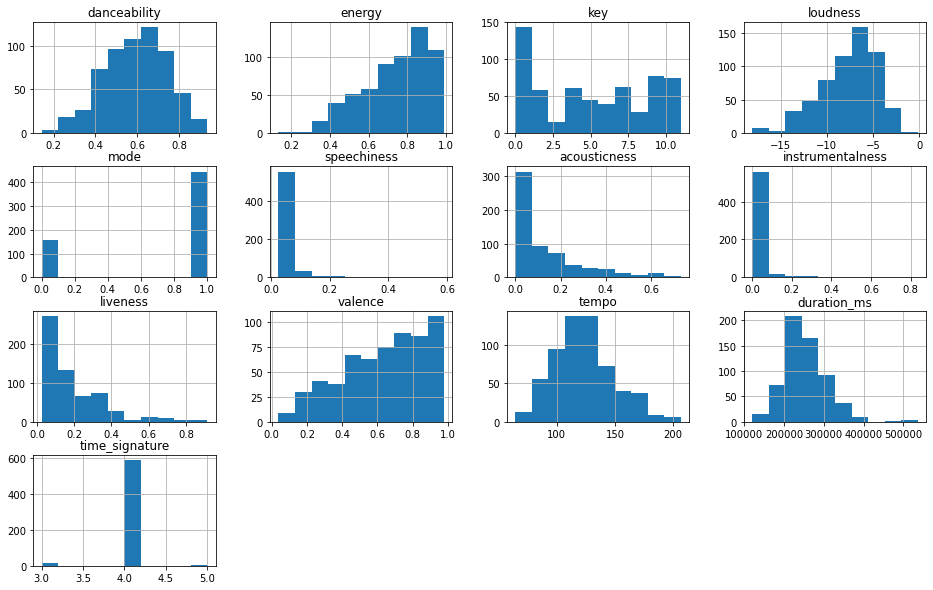

In [155]:
df_compile.hist(figsize = (16,10))

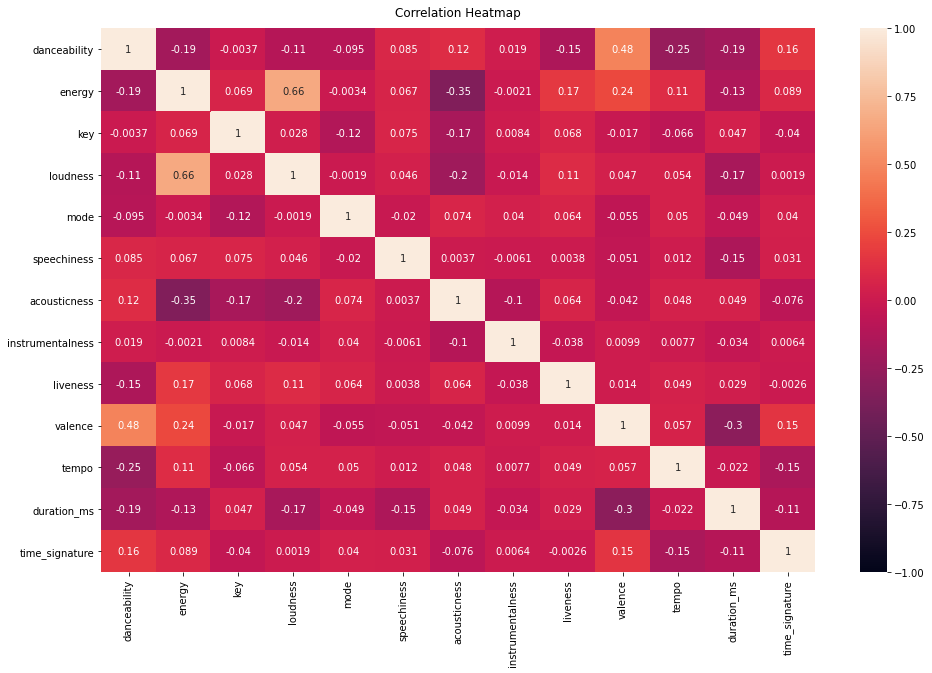

In [173]:
plt.figure(figsize = (16,10))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.

heatmap = sns.heatmap(df_compile.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


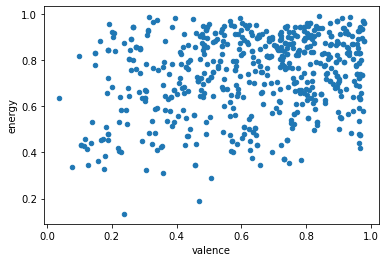

In [183]:
df_compile.plot(x = 'valence', y = 'energy', kind = 'scatter');

Create clusters by Genre

In [214]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, n_jobs=-1))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)


NameError: name 'genre_data' is not defined

Visualizing the clusters

In [ ]:
from sklearn.manifold import TSNE
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=2))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

In [ ]:
import plotly.express as px
fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

Clustering Songs

In [ ]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=2, n_jobs=4))],verbose=True)
X = spotify_data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
spotify_data['cluster_label'] = song_cluster_labels

Visualizing the song clusters with PCA

In [ ]:
from sklearn.decomposition import PCA
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = spotify_data['name']
projection['cluster'] = spotify_data['cluster_label']


Generating song recommendations using cdist and cosine

In [ ]:
from collections import defaultdict
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

def get_song_data(song, spotify_data):
    
    """
    Gets the song data for a specific song. The song argument takes the form of a dictionary with 
    key-value pairs for the name and release year of the song.
    """
    
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) 
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    
    except IndexError:
        return find_song(song['name'], song['year'])
        

def get_mean_vector(song_list, spotify_data):
  
    """
    Gets the mean vector for a list of songs.
    """
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

def flatten_dict_list(dict_list):
   
    """
    Utility function for flattening a list of dictionaries.
    """
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict
        

def recommend_songs(song_list, spotify_data, n_songs=10):
  
    """
    Recommends songs based on a list of previous songs that a user has listened to.
    """
    
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')